In [2]:
import time
import pandas as pd
import re
import datetime

# Data Loading

In [3]:
# load the csv file into a pandas dataframe
df = pd.read_csv("discord_channel_messages.csv")
df

,author,content,timestamp
0,KILLFEED,"jayster got killed by Angemon (AUR AX, 26.93m)",2025-04-06T00:51:46.614Z
1,Unknown,"Joby1kinoby got killed by Big (M4-A1, 15.82m)",2025-04-06T00:51:56.935Z
2,KILLFEED,"Survivor (2) got killed by Survivor (VS-89, 65...",2025-04-06T03:09:18.910Z
3,KILLFEED,Isabelle Vadnais got killed by Romanov (M70 Tu...,2025-04-06T05:15:58.886Z
4,KILLFEED,"Survivor got killed by Romanov (M4-A1, 2.9m)",2025-04-06T05:36:02.298Z
...,...,...,...
4993,KILLFEED,"Toshiks got killed by Scorpion (Blaze, 240.38m)",2024-09-17T16:46:03.191Z
4994,KILLFEED,Jimmie Grinney got killed by Klase (CR-550 Sav...,2024-09-17T17:31:57.047Z
4995,Unknown,"[CCCP]kroLik got killed by Quess who? (USG-45,...",2024-09-17T17:36:29.176Z
4996,KILLFEED,prime got killed by [adidas]son of palych (KA-...,2024-09-17T17:55:56.805Z


# Data Processing

In [4]:
# load the csv file into a pandas dataframe
df = pd.read_csv("discord_channel_messages.csv")

# drop author column
df.drop(columns=['author'], inplace=True)

# Split column content
# Victim: before the first " got killed by "
# Killer: between " got killed by " and " "
# Meter: after ", " and before "m)"

df['Victim'] = df['content'].str.extract(r'^(.*?) got killed by ')

# if Victim contains "Survivor (<any number>)" set the String to "User"
df['Victim'] = df['Victim'].str.replace(r'Survivor \(\d+\)', 'Survivor', regex=True)


# tmp: everything after 'got killed by '
df['tmp2'] = df['content'].str.split('got killed by ').str[1]


df['Meter'] = df['content'].str.extract(r', (.*?)m\)')

# TMP: reverse the order of the characters in colmn content
df['tmp'] = df['content'].str[::-1]
# keep everything after the first " ," 
df['tmp'] = df['tmp'].str.split(' ,').str[1]
# remove everything behind the first "( " with regex
df['tmp'] = df['tmp'].str.replace(r'\(.*', '', regex=True)
# reverse the order of the characters in column tmp again
df['Weapon'] = df['tmp'].str[::-1]
# split the column tmp2 by " (". Sometimes there are two " (" in the column in this case we combine [0] and [1]
df['Killer'] = df['tmp2'].str.split(' \(').str[0]
# drop the column tmp2
df.drop(columns=['tmp'], inplace=True)
df.drop(columns=['tmp2'], inplace=True)


# drop the column content
df.drop(columns=['content'], inplace=True)

# create column date and column time from the column timestamp
df['date'] = pd.to_datetime(df['timestamp']).dt.date
df['time'] = pd.to_datetime(df['timestamp']).dt.time
# drop the column timestamp
df.drop(columns=['timestamp'], inplace=True)

df['date'] = pd.to_datetime(df['date'])

# remove everything behind . of colum time
df['time'] = df['time'].astype(str).str.split('.').str[0]

#df['time'] = pd.to_datetime(df['time'], format='%H:%M:%S').dt.time
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d').dt.date

# drop duplicate rows
df.drop_duplicates(inplace=True)

#  cast m to number
df['Meter'] = df['Meter'].str.replace('m', '').astype(float)

df

,Victim,Meter,Weapon,Killer,date,time
0,jayster,26.93,AUR AX,Angemon,2025-04-06,00:51:46
1,Joby1kinoby,15.82,M4-A1,Big,2025-04-06,00:51:56
2,Survivor,656.28,VS-89,Survivor,2025-04-06,03:09:18
3,Isabelle Vadnais,77.46,M70 Tundra,Romanov,2025-04-06,05:15:58
4,Survivor,2.90,M4-A1,Romanov,2025-04-06,05:36:02
...,...,...,...,...,...,...
4993,Toshiks,240.38,Blaze,Scorpion,2024-09-17,16:46:03
4994,Jimmie Grinney,207.17,CR-550 Savanna,Klase,2024-09-17,17:31:57
4995,[CCCP]kroLik,0.87,USG-45,Quess who?,2024-09-17,17:36:29
4996,prime,5.58,KA-74,[adidas]son of palych,2024-09-17,17:55:56


# Analysis

In [5]:
# visualize the data
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style of seaborn
sns.set(style="whitegrid", palette="pastel", font_scale=1.2)


## Kills per Player

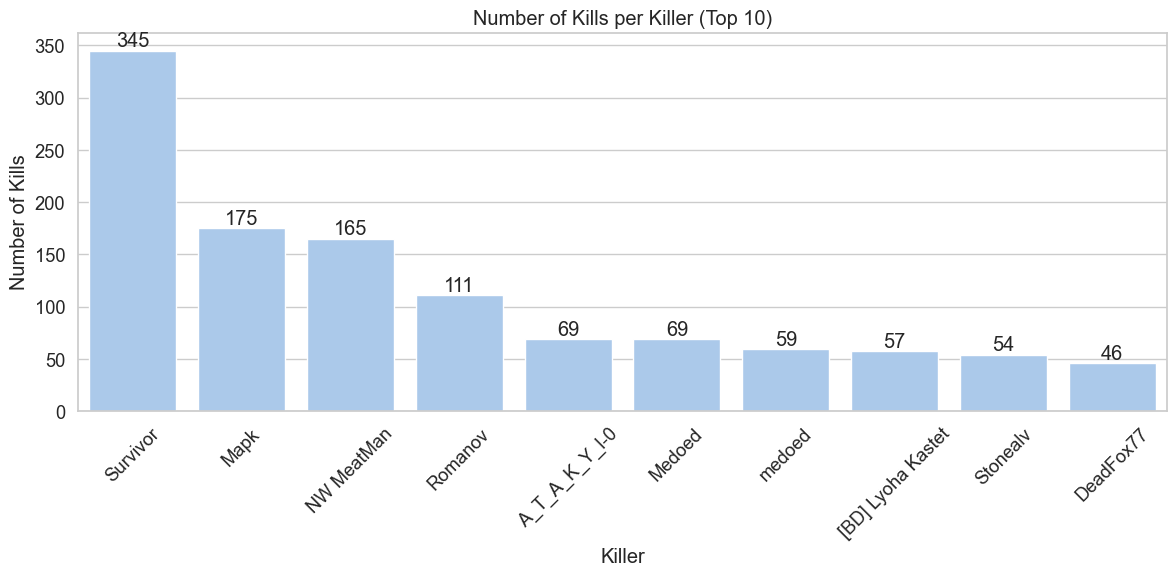

In [6]:
# Create a count plot of the number of kills per killer (top 10)
plt.figure(figsize=(12, 6))
top_10_killers = df['Killer'].value_counts().head(10).index
sns.countplot(data=df[df['Killer'].isin(top_10_killers)], x='Killer', order=top_10_killers)
plt.title('Number of Kills per Killer (Top 10)')
plt.xlabel('Killer')
plt.ylabel('Number of Kills')
plt.xticks(rotation=45)

# Add labels to the bars
for container in plt.gca().containers:
    plt.gca().bar_label(container, fmt='%d', label_type='edge')

plt.tight_layout()
plt.show()


## Death per Player

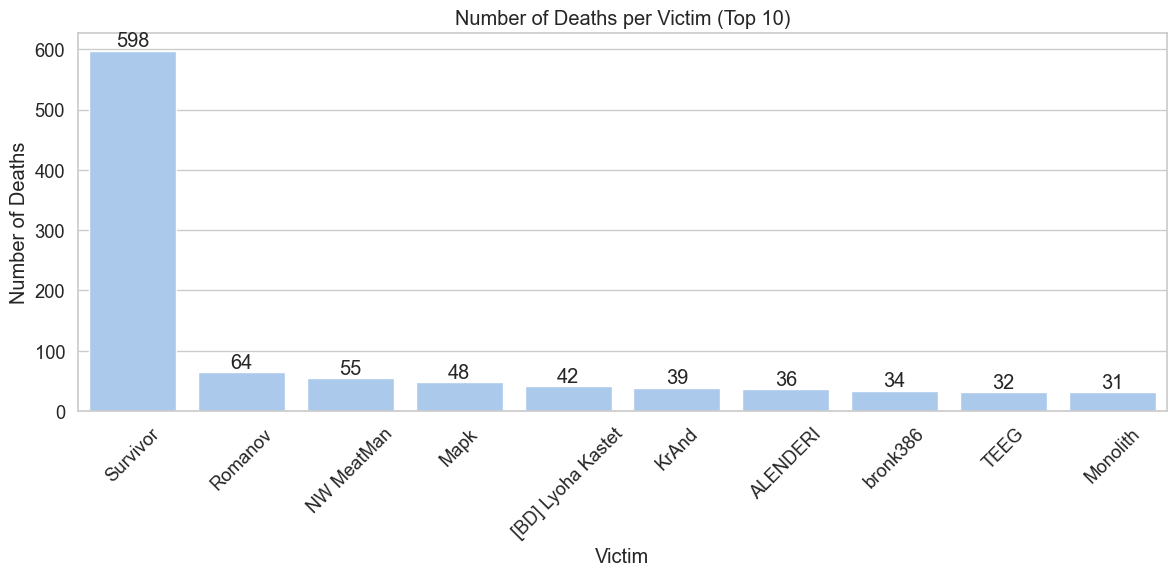

In [7]:
# Create a count plot of the number of deaths per victim (top 10)
plt.figure(figsize=(12, 6))
top_10_victims = df['Victim'].value_counts().head(10).index
sns.countplot(data=df[df['Victim'].isin(top_10_victims)], x='Victim', order=top_10_victims)
plt.title('Number of Deaths per Victim (Top 10)')
plt.xlabel('Victim')
plt.ylabel('Number of Deaths')
plt.xticks(rotation=45)

# Add labels to the bars
for container in plt.gca().containers:
    plt.gca().bar_label(container, fmt='%d', label_type='edge')

plt.tight_layout()
plt.show()

## K/D

In [21]:
import numpy as np  # for simple mathematics

# Code for Df with Kills und Deaths per Player
all_players = pd.concat([df['Killer'], df['Victim']]).unique()
kd_df = pd.DataFrame({
    'Name': all_players,
    'Kills': pd.Series(all_players).map(df['Killer'].value_counts()).fillna(0).astype(int),
    'Deaths': pd.Series(all_players).map(df['Victim'].value_counts()).fillna(0).astype(int)
})

# add KDR
kd_df['KDR'] = np.where(
    kd_df['Deaths'] > 0,  # Nur teilen, wenn Deaths > 0
    kd_df['Kills'] / kd_df['Deaths'],  # Kills/Deaths
    kd_df['Kills']  # Wenn Deaths=0, setze KDR = Kills
)

# round to 2 decimal numbers
kd_df['KDR'] = kd_df['KDR'].round(2).astype(float)

# sort the results
kd_df = kd_df.sort_values('Kills', ascending=False).reset_index(drop=True)

kd_df.head(25)

,Name,Kills,Deaths,KDR
0,Survivor,345,598,0.58
1,Mapk,175,48,3.65
2,NW MeatMan,165,55,3.00
3,Romanov,111,64,1.73
4,Medoed,69,27,2.56
5,A_T_A_K_Y_l-0,69,25,2.76
6,medoed,59,19,3.11
7,[BD] Lyoha Kastet,57,42,1.36
8,Stonealv,54,17,3.18
9,DeadFox77,46,31,1.48


In [9]:
kd_buzz = kd_df[kd_df['Name'].str.contains('BuZz|Mampfo', case=True)]
kd_buzz.reset_index(drop=True, inplace=True)
kd_buzz.head(10)

,Name,Kills,Deaths,KDR
0,[BuZz] John Pork,7,4,1.75
1,[BuZz] taubenschreck,7,2,3.50
2,Mampfo,5,0,5.00
3,[BuZz] Luca,4,1,4.00
4,[BuZz] Bratan Joseph,2,0,2.00
5,[BuZz] Stepmotherlover,1,1,1.00
6,[BuZz] taubenschreck (Survivor 6),0,1,0.00
7,[BuZz] HW4 ??,0,1,0.00


## Greatest Enemy

In [20]:
# Calculate the killer who killed each victim the most times
most_frequent_killer_per_victim = df.groupby(['Victim', 'Killer']).size().reset_index(name='Kill Count')
most_frequent_killer_per_victim = most_frequent_killer_per_victim.loc[
    most_frequent_killer_per_victim.groupby('Victim')['Kill Count'].idxmax()
].reset_index(drop=True)

most_frequent_killer_per_victim = most_frequent_killer_per_victim.sort_values('Kill Count', ascending=False).reset_index(drop=True)

most_frequent_killer_per_victim.head(10)

,Victim,Killer,Kill Count
0,Survivor,Survivor,60
1,Pauke,[BD] Lyoha Kastet,6
2,ALENDERI,Survivor,5
3,Cateye,James,5
4,Sattobi98,Mapk,5
5,KrAnd,Mapk,5
6,Abakymov,evh,5
7,Czarny,Mapk,4
8,Beetlepimp,NW MeatMan,4
9,radik,Survivor,4


## Kills by Meter

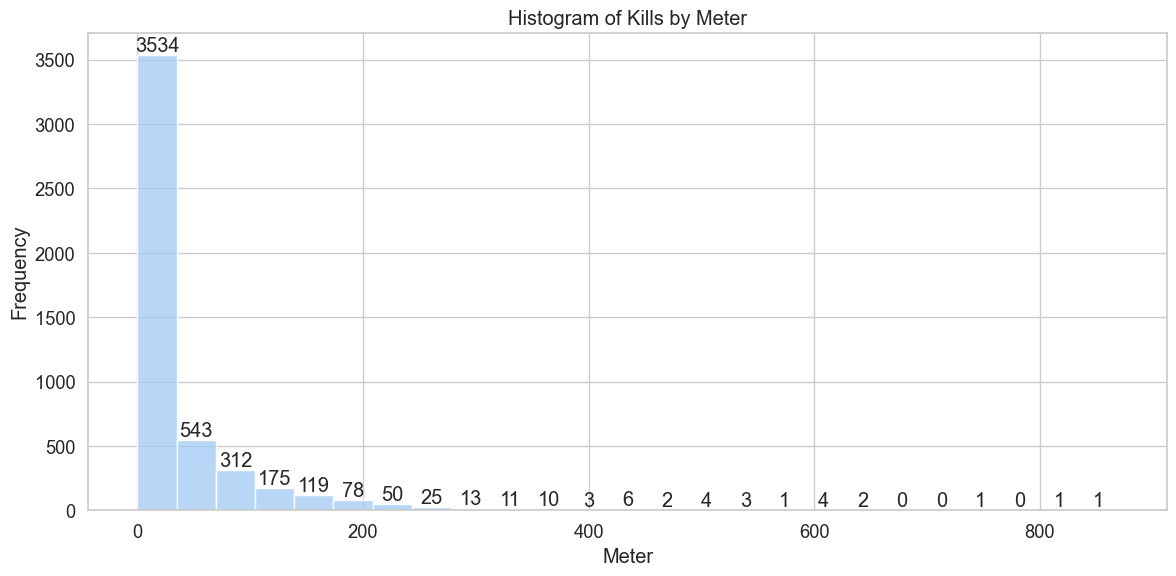

In [11]:
# Create a histogram for the Meter column with automatic bins
plt.figure(figsize=(12, 6))
ax = sns.histplot(data=df, x='Meter', bins=25, kde=False)
plt.title('Histogram of Kills by Meter')
plt.xlabel('Meter')
plt.ylabel('Frequency')

# Add labels to the bars
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge')

plt.tight_layout()
plt.show()


### Leaderboard for longes kills

In [12]:
# table of the top 10 kills by meter
top_10_kills_by_meter = df.nlargest(10, 'Meter')
top_10_kills_by_meter.reset_index(drop=True, inplace=True)
top_10_kills_by_meter


,Victim,Meter,Weapon,Killer,date,time
0,Reinhart Beinhart,868.96,DMR,Darkness,2025-03-24,18:38:25
1,Mr.Freeman,812.79,DMR,[BuZz] John Pork,2025-04-04,18:57:39
2,Edicson,737.03,M70 Tundra,NW MeatMan,2024-11-25,19:43:39
3,Survivor,656.28,VS-89,Survivor,2025-04-06,03:09:18
4,FOneks,640.85,VSD,PipaFria,2024-11-20,21:11:02
5,incapablos,619.83,M70 Tundra,4yga,2024-12-01,20:32:20
6,Valkone,617.67,DMR,NW MeatMan,2024-11-16,10:51:38
7,Survivor,616.85,M70 Tundra,ROMAN,2024-10-26,21:14:19
8,pork,604.89,M70 Tundra,chste043,2025-02-22,17:24:00
9,DIRTY PICKLE,588.02,CR-527,Survivor,2024-11-23,21:40:08


### Kill distance by weapon

In [13]:
# Average kill distance per Weapon
average_kill_distance = df.groupby('Weapon')['Meter'].mean().reset_index()
average_kill_distance.rename(columns={'tmp': 'Weapon', 'Meter': 'Average Distance (m)'}, inplace=True)
average_kill_distance.sort_values(by='Average Distance (m)', ascending=False, inplace=True,)
average_kill_distance['Average Distance (m)'] = average_kill_distance['Average Distance (m)'].round(2)
average_kill_distance.reset_index(drop=True, inplace=True)


# add max kill distance to the table
max_kill_distance = df.groupby('Weapon')['Meter'].max().reset_index()
max_kill_distance.rename(columns={'tmp': 'Weapon', 'Meter': 'Max Distance (m)'}, inplace=True)
max_kill_distance.sort_values(by='Max Distance (m)', ascending=False, inplace=True)
max_kill_distance.reset_index(drop=True, inplace=True)
# merge the two tables
average_kill_distance = pd.merge(average_kill_distance, max_kill_distance, on='Weapon')

average_kill_distance.head(10)

,Weapon,Average Distance (m),Max Distance (m)
0,CR-550 Savanna,128.95,442.75
1,M70 Tundra,126.93,737.03
2,VS-89,107.71,656.28
3,VSD,96.57,640.85
4,Blaze,87.48,497.17
5,Mosin 91/30,76.85,440.96
6,DMR,72.61,868.96
7,Pioneer,59.45,176.86
8,SSG 82,56.65,182.09
9,CR-527,55.37,588.02


## Top Weapons

In [14]:
# all kills with weapon "Potato"
potato_kills = df[df['Weapon'] == 'Potato']
potato_kills

,Victim,Meter,Weapon,Killer,date,time
125,B1100110011,0.89,Potato,[Gr0b]youGamElling!0.o,2025-04-02,19:50:59


### Top weapons by kill count

In [15]:
# Top weapons by kill count with average distance
top_weapons_by_kill_count = df['Weapon'].value_counts().reset_index()
top_weapons_by_kill_count.columns = ['Weapon', 'Kill Count']
top_weapons_by_kill_count.reset_index(drop=True, inplace=True)

# Merge with average kill distance
top_weapons_with_avg_distance = top_weapons_by_kill_count.merge(
    average_kill_distance, on='Weapon', how='left'
)

# Sort by kill count and display the top 10
top_weapons_with_avg_distance.sort_values(by='Kill Count', ascending=False, inplace=True)
top_weapons_with_avg_distance.head(10)


,Weapon,Kill Count,Average Distance (m),Max Distance (m)
0,KA-74,458,14.00,169.67
1,DMR,325,72.61,868.96
2,M70 Tundra,286,126.93,737.03
3,M4-A1,264,26.51,383.80
4,KA-M,244,14.17,148.08
5,Blaze,185,87.48,497.17
6,BK-43,177,7.69,36.86
7,LAR,175,45.98,236.36
8,VSD,169,96.57,640.85
9,KA-101,149,14.78,132.10


## Kills per hour of the day

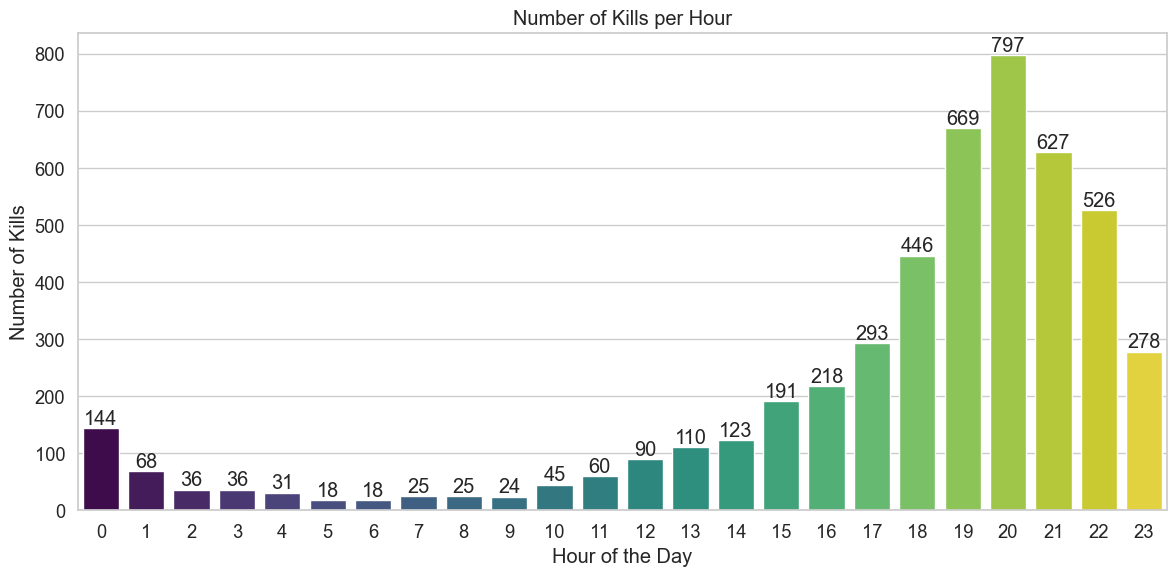

In [16]:
# visualize the time and frequency of kills per hour
plt.figure(figsize=(12, 6))
# Convert the 'time' column to datetime format for easier manipulation
df['time'] = pd.to_datetime(df['time'], format='%H:%M:%S').dt.time
# Create a new column for the hour of the kill
df['hour'] = pd.to_datetime(df['time'], format='%H:%M:%S').dt.hour
# Create a count plot of the number of kills per hour
sns.countplot(data=df, x='hour',hue='hour', palette='viridis', legend=False)
plt.title('Number of Kills per Hour') 
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Kills')
# Add labels to the bars
for container in plt.gca().containers:
    plt.gca().bar_label(container, fmt='%d', label_type='edge')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

## BuZz Statistics

In [17]:
# top 5 killer with the text "BuZz" in their name
top_5_killers_buzz = df[df['Killer'].str.contains('BuZz', case=False)]['Killer'].value_counts().head(5).reset_index()
top_5_killers_buzz.columns = ['Killer', 'Kill Count']
top_5_killers_buzz.reset_index(drop=True, inplace=True)
top_5_killers_buzz.head(5)

,Killer,Kill Count
0,[BuZz] taubenschreck,7
1,[BuZz] John Pork,7
2,[BuZz] Luca,4
3,[BuZz] Bratan Joseph,2
4,[BuZz] Stepmotherlover,1


In [18]:
# list all kills with the text "BuZz" in their name
kills_buzz = df[df['Killer'].str.contains('BuZz', case=False)]
kills_buzz.reset_index(drop=True, inplace=True)
# reorder the columns
kills_buzz = kills_buzz[['Killer', 'Victim', 'Weapon', 'Meter', 'date', 'time']]
kills_buzz.head(50)

,Killer,Victim,Weapon,Meter,date,time
0,[BuZz] taubenschreck,Kuma,DMR,6.71,2025-04-07,18:20:15
1,[BuZz] taubenschreck,Devimon,DMR,171.96,2025-04-07,19:50:15
2,[BuZz] taubenschreck,DeadFox77,DMR,240.18,2025-04-07,19:51:16
3,[BuZz] Luca,Angemon,VSD,34.64,2025-04-07,20:27:06
4,[BuZz] Luca,Stonealv,VSD,33.33,2025-04-07,20:27:12
5,[BuZz] Stepmotherlover,DeadFox77,AUR AX,52.23,2025-04-07,20:57:09
6,[BuZz] Luca,Devimon,VSD,69.32,2025-04-07,20:57:10
7,[BuZz] John Pork,Fupp,DMR,21.35,2025-04-03,21:49:08
8,[BuZz] John Pork,Mr.Freeman,DMR,812.79,2025-04-04,18:57:39
9,[BuZz] John Pork,Apian,DMR,3.07,2025-04-01,20:52:08
